In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

- So we learnt that by the end of 2019, 756 matches were held.

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


- Fun fact **179078** balls were balled in IPL till 2019

In [6]:
delivery.shape

(179078, 21)

- We are grouping the data_frame by 'match_id','innings' and using .sum() we are getting the total runs of each innings 

In [7]:
total_score_df = delivery.groupby(['match_id','inning']).sum()["total_runs"].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [8]:
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [9]:
total_score_df.shape , match.shape

((756, 3), (756, 18))

In [10]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on="id",right_on="match_id")

In [11]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

- From the above , we can notice that there are lot of these teams which don't play IPL nowadays.

In [12]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [13]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


- We are trying to take the teams present in teams

In [14]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(641, 20)

In [16]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

- So from the above graph we can say that 15 matches were affected by rain

In [17]:
match_df = match_df[['match_id','city','winner','total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [18]:
delivery_df = match_df.merge(delivery, on='match_id')

In [19]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [20]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


- If we look in to the **'total_runs_y'** columns we notice that this columns shows how much runs has been scored in consecutive balls.
- we use .cumsum() on this column to convert 0 to previous runs

In [21]:
delivery_df['current_score'] =delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [22]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
152055,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
152056,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
152057,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


- Now if we substract  **'total_runs_x'** with **'current_score'** and we got the total runs left to score after each ball

## Runs Left Column

In [23]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [24]:
delivery_df.tail(20)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
152039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,17,5,SR Watson,...,0,0,1,1,2,NaN,NaN,NaN,116,36
152040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,17,6,DJ Bravo,...,0,0,1,0,1,NaN,NaN,NaN,117,35
152041,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,1,DJ Bravo,...,0,0,1,0,1,NaN,NaN,NaN,118,34
152042,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,2,SR Watson,...,0,0,6,0,6,NaN,NaN,NaN,124,28
152043,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,3,SR Watson,...,0,0,6,0,6,NaN,NaN,NaN,130,22
152044,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,4,SR Watson,...,0,0,6,0,6,NaN,NaN,NaN,136,16
152045,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,5,SR Watson,...,0,0,0,0,0,NaN,NaN,NaN,136,16
152046,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,18,6,SR Watson,...,0,0,1,0,1,NaN,NaN,NaN,137,15
152047,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,1,SR Watson,...,0,0,1,0,1,NaN,NaN,NaN,138,14
152048,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,...,0,0,0,0,0,DJ Bravo,caught,Q de Kock,138,14


- 0.1 is not the first ball of the first over
- instead 1.1 is the first ball of the first over

## Balls Left Column

In [25]:
delivery_df['balls_left'] = 126 - (delivery_df.over*6 + delivery_df.ball)

In [26]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
152055,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
152056,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
152057,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


## Wickets Left

In [27]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [28]:
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
152055,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
152056,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
152057,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4


# Current run Rate/ Required Run Rate

In [29]:
# currernt Run Rate = runs/over
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [30]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

In [31]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
152055,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
152056,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
152057,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


## Result
- if the batting_team and the wining team are same then 1

In [32]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [33]:
delivery_df['result'] =  delivery_df.apply(result,axis=1)

In [34]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152054,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
152055,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
152056,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
152057,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


In [35]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x', 'crr'  , 'rrr', 'result']]

In [36]:
final_df.dropna(inplace=True)

C:\Users\nabar\AppData\Local\Temp\ipykernel_6160\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


- We are shuffling the 'final_df' to reduce bias since all the balls of the same matches are grouped together

In [37]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
107028,Kolkata Knight Riders,Sunrisers Hyderabad,Visakhapatnam,102,72,8,176,9.250000,8.500000,0
21433,Deccan Chargers,Kolkata Knight Riders,Cape Town,49,66,8,101,5.777778,4.454545,1
46642,Deccan Chargers,Kings XI Punjab,Dharamsala,20,14,5,174,8.716981,8.571429,1
98083,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,96,71,9,142,5.632653,8.112676,1
101184,Mumbai Indians,Rajasthan Royals,Mumbai,69,59,6,189,11.803279,7.016949,1
...,...,...,...,...,...,...,...,...,...,...
81833,Kings XI Punjab,Chennai Super Kings,Chennai,15,0,4,186,8.550000,inf,0
116003,Kolkata Knight Riders,Delhi Daredevils,Kolkata,49,79,10,98,7.170732,3.721519,1
137408,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,109,80,9,179,10.500000,8.175000,0
51064,Royal Challengers Bangalore,Chennai Super Kings,Chennai,182,119,10,183,6.000000,9.176471,0


## Training the model

In [38]:
final_df=final_df[final_df['balls_left']!=0] 

In [39]:
X=final_df.iloc[:,:-1]
Y=final_df.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [41]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
119292,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,158,96,10,194,9.000000,9.875000
55660,Kolkata Knight Riders,Chennai Super Kings,Kolkata,107,114,10,114,7.000000,5.631579
77173,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,108,86,8,152,7.764706,7.534884
51761,Delhi Daredevils,Deccan Chargers,Delhi,135,89,8,168,6.387097,9.101124
58623,Mumbai Indians,Kolkata Knight Riders,Kolkata,131,86,9,175,7.764706,9.139535
...,...,...,...,...,...,...,...,...,...
103907,Mumbai Indians,Kings XI Punjab,Mumbai,61,17,4,177,6.757282,21.529412
43262,Mumbai Indians,Chennai Super Kings,Chennai,79,43,6,165,6.701299,11.023256
44973,Kings XI Punjab,Delhi Daredevils,Delhi,12,22,8,111,6.061224,3.272727
105860,Kolkata Knight Riders,Kings XI Punjab,Pune,2,17,5,155,8.912621,0.705882


- Three of the columns are strings so we need to perform One hot encoding

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer(
    [
        ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
    ]
    ,remainder='passthrough'
)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline(steps=[
        ('step1',trf),
        ('step2',LogisticRegression(solver='liblinear'))
])

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [46]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,57786.000000,57786.000000,57786.000000,57786.000000,57786.000000,57786.000000
mean,92.824473,63.223999,7.562922,165.622798,7.474129,10.291343
std,49.922646,33.238870,2.124855,29.479796,2.309622,13.587926
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,54.000000,35.000000,6.000000,147.000000,6.279070,7.135135
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.861538
75%,130.000000,92.000000,9.000000,185.000000,8.727273,10.857143
max,249.000000,119.000000,10.000000,250.000000,36.000000,678.000000


In [47]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.77      0.79      6846
           1       0.80      0.82      0.81      7601

    accuracy                           0.80     14447
   macro avg       0.80      0.80      0.80     14447
weighted avg       0.80      0.80      0.80     14447



- We create a function to analyze each match

In [48]:
delivery_df.tail(10)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
152049,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,3,RA Jadeja,...,0,NaN,NaN,140,12,9,5,7.567568,8.000000,0
152050,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,4,RA Jadeja,...,0,NaN,NaN,140,12,8,5,7.500000,9.000000,0
152051,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,5,RA Jadeja,...,0,NaN,NaN,142,10,7,5,7.539823,8.571429,0
152052,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,19,6,RA Jadeja,...,0,NaN,NaN,150,2,6,5,7.894737,2.000000,0
152053,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,...,0,NaN,NaN,151,1,5,5,7.878261,1.200000,0
152054,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
152055,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
152056,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
152057,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0
152058,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,1,lbw,NaN,157,-5,0,3,7.850000,-inf,0


In [49]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
152053,Chennai Super Kings,Mumbai Indians,Hyderabad,1,5,5,152,7.878261,1.200000,0
152054,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
152055,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
152056,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0


-   We are taking balls from the column 'balls' after an interval of 6 balls, so basically we are evaluating the data set after an interval of a single over.
-   After that we are taking the required columns form the data set 
-   After that we are removing balls _left == 0 because at balls == 0 we dont need to predict since we already have the winner or the Loser
-   We then send the dataset to the pipeline
-   


In [50]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [51]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10616,1,4,0,56.3,43.7
10624,2,8,0,50.9,49.1
10630,3,1,0,57.6,42.4
10636,4,7,1,69.5,30.5
10642,5,12,0,59.4,40.6
10648,6,13,0,47.0,53.0
10654,7,9,0,41.0,59.0
10662,8,15,0,27.2,72.8
10668,9,7,0,25.0,75.0
10675,10,17,0,13.6,86.4


Text(0.5, 1.0, 'Target-178')

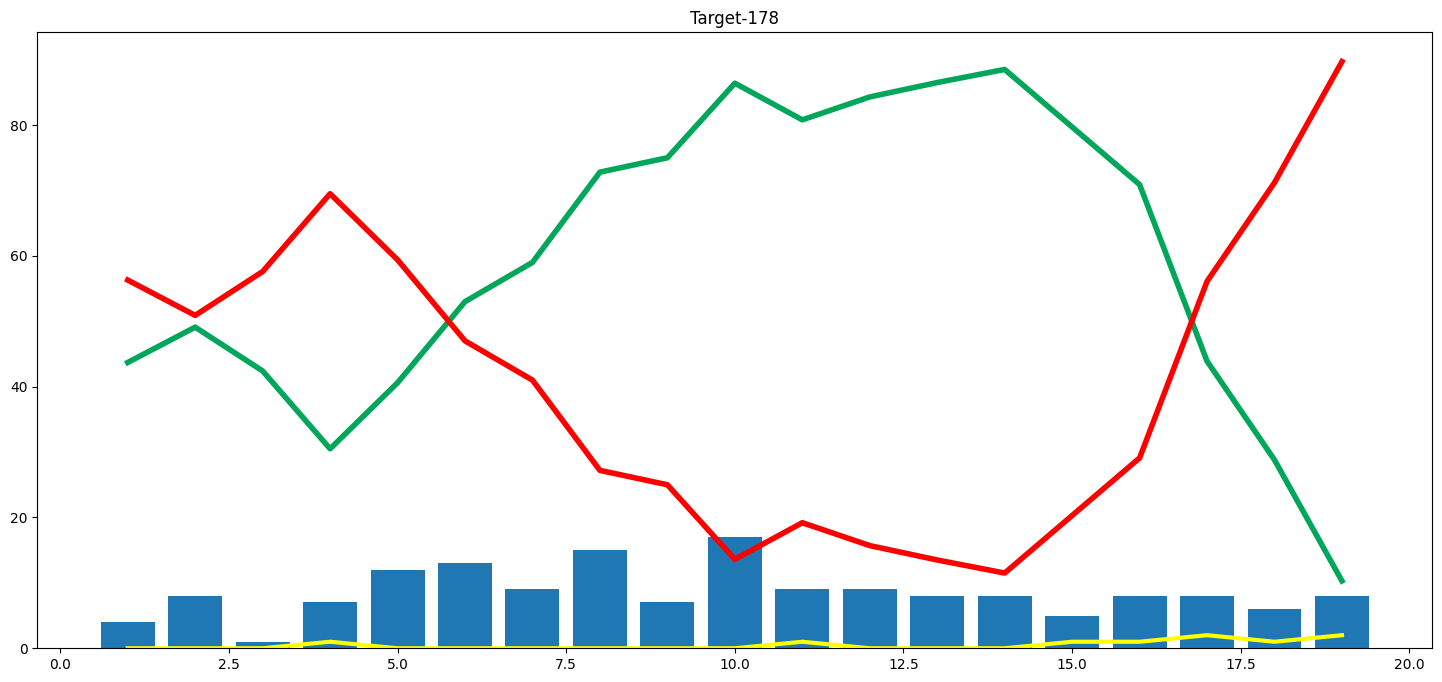

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df["end_of_over"],temp_df['wickets_in_over'],color="yellow",linewidth = 3)
plt.plot(temp_df["end_of_over"],temp_df['win'],color="#00a65a",linewidth = 4)
plt.plot(temp_df["end_of_over"],temp_df['lose'],color="red",linewidth = 4)
plt.bar(temp_df["end_of_over"],temp_df['runs_after_over'])
plt.title("Target-"+str(target))

In [53]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [54]:
np.unique(delivery_df['city'].dropna())

array(['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bengaluru', 'Bloemfontein',
       'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack',
       'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad',
       'Indore', 'Jaipur', 'Johannesburg', 'Kimberley', 'Kolkata',
       'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur',
       'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)

In [55]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))